In [1]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run cell',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.restart_run_all();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [2]:
import silq
silq.initialize("EWJN", ignore=['layout', 'parameters'])

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Test ArbStudio ramping

In [3]:
### Layout and connectivity
layout = Layout(name='layout',
                instrument_interfaces=list(interfaces.values()),
                server_name='layout_server')

layout.primary_instrument('pulseblaster')
layout.acquisition_instrument('ATS')

# Pulseblaster output connections
layout.add_connection(output_arg='pulseblaster.ch1',
                      input_arg='arbstudio.trig_in',
                      trigger=True)
layout.add_connection(output_arg='pulseblaster.ch4',
                      input_arg='ATS.trig_in',
                      trigger=True)

# Arbstudio output connections
c3 = layout.add_connection(output_arg='arbstudio.ch3',
                           input_arg='ATS.chC', default=True)


# Specify acquisition channels
layout.acquisition_outputs([('arbstudio.ch3', 'pulses')])

In [26]:
ramp_pulse1 = DCRampPulse(amplitude_start=-1, amplitude_stop=1,
                          duration=10, acquire=True)
ramp_pulse2 = DCRampPulse(amplitude_start=-1, amplitude_stop=1,
                          duration=20, acquire=True)
ramp_pulse3 = DCRampPulse(amplitude_start=-1, amplitude_stop=1,
                          duration=30, acquire=True)
final_pulse = DCPulse(name='final', amplitude=0,
                      duration=2)
pulses = [ramp_pulse1, ramp_pulse2, ramp_pulse3, final_pulse]

pulse_sequence = PulseSequence(pulses)
layout.target_pulse_sequence(pulse_sequence)

In [23]:
pulse_sequence = interfaces['pulseblaster'].pulse_sequence()
pulse_sequence[1].t_start = 9
interfaces['pulseblaster'].pulse_sequence(pulse_sequence)

In [27]:
layout.stop()
layout.setup(samples=3)
layout.start()
result = layout.acquisition()
layout.stop()

In [28]:
layout.start()

<IPython.core.display.Javascript object>


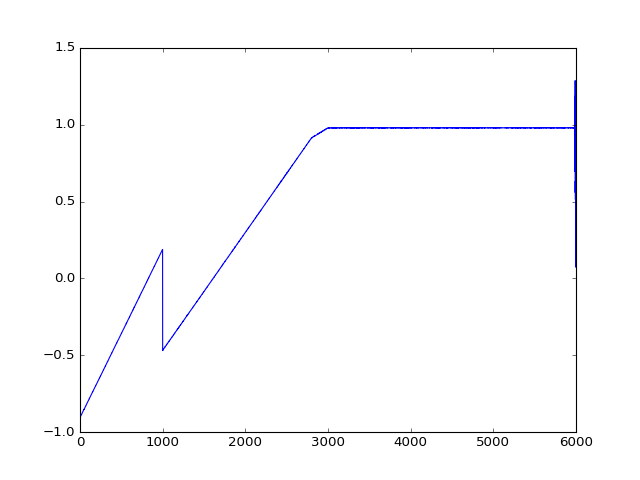

In [20]:
plt.plot(result[0])

In [29]:
layout.close()

# Test PulseBlaster

In [3]:
### Layout and connectivity
layout = Layout(name='layout',
                instrument_interfaces=list(interfaces.values()),
                server_name='layout_server')

layout.primary_instrument('pulseblaster')
layout.acquisition_instrument('ATS')

# Pulseblaster output connections
layout.add_connection(output_arg='pulseblaster.ch1',
                      input_arg='arbstudio.trig_in',
                      trigger=True)
layout.add_connection(output_arg='pulseblaster.ch4',
                      input_arg='ATS.trig_in',
                      trigger=True)

# Arbstudio output connections
c3 = layout.add_connection(output_arg='arbstudio.ch3',
                           input_arg='ATS.chC', default=True)

# Specify acquisition channels
layout.acquisition_outputs([('arbstudio.ch3', 'pulses')])

In [8]:
pulses = []
pulses += [TriggerPulse(t_start=0, connection_requirements={'input_arg': 'arbstudio.trig_in'}),
           TriggerPulse(t_start=0, connection_requirements={'input_arg': 'ATS.trig_in'}),
           MarkerPulse(t_start=3, duration=1, connection_requirements={'input_arg': 'ATS.trig_in'}),
           TriggerPulse(t_start=5, connection_requirements={'input_arg': 'ATS.trig_in'}),
           MarkerPulse(t_start=7, duration=2, connection_requirements={'input_arg': 'ATS.trig_in'}),
           TriggerPulse(t_start=8, connection_requirements={'input_arg': 'arbstudio.trig_in'})
           ]

pulse_sequence = PulseSequence(pulses)
layout.target_pulse_sequence(pulse_sequence)
layout.setup()

In [9]:
pulseblaster.instructions()

[(9, 'continue', 0, 100),
 (0, 'continue', 0, 2999900),
 (8, 'continue', 0, 1000000),
 (0, 'continue', 0, 1000000),
 (8, 'continue', 0, 100),
 (0, 'continue', 0, 1999900),
 (8, 'continue', 0, 1000000),
 (9, 'continue', 0, 100),
 (8, 'continue', 0, 999900),
 (0, 'branch', 0, 50)]